In [1]:
using DelimitedFiles
using Plots

In [2]:
path="z0.50/BAO/"

"z0.50/BAO/"

In [3]:
Pk_mean = zeros(30, 2);
Pk_var = zeros(30);

In [4]:
Nfiles = 0
for filename in readdir(path)
    if filename[1:3] == "Pk_"
        Pk = readdlm(string(path,filename))
        Nfiles += 1
        Pk_mean += Pk
    end
end
#print(size(Bkk_mean))
#print(Nfiles)
Pk_mean /= Nfiles;
Nfiles = 0
for filename in readdir(path)
    if filename[1:3] == "Pk_"
        Pk = readdlm(string(path,filename))
        Nfiles += 1
        Pk_var += (Pk_mean[:,2] .- Pk[:,2]).^2
    end
end
Pk_var = Pk_var/Nfiles;

In [5]:
path="z0.50/noBAO/"

"z0.50/noBAO/"

In [6]:
Pk_mean_no = zeros(30, 2);
Pk_var_no = zeros(30);
Nfiles = 0
for filename in readdir(path)
    if filename[1:3] == "Pk_"
        Pk = readdlm(string(path,filename))
        Nfiles += 1
        Pk_mean_no += Pk
    end
end
Pk_mean_no /= Nfiles;
Nfiles = 0
for filename in readdir(path)
    if filename[1:3] == "Pk_"
        Pk = readdlm(string(path,filename))
        Nfiles += 1
        Pk_var_no += (Pk_mean_no[:,2] .- Pk[:,2]).^2
    end
end
Pk_var_no = Pk_var_no/Nfiles;

In [7]:
ratio = Pk_mean_no[:,2]./Pk_mean[:,2];
ratio_var = (Pk_var./Pk_mean[:,2].^2 .+ Pk_var_no./Pk_mean_no[:,2].^2).*ratio.^2;

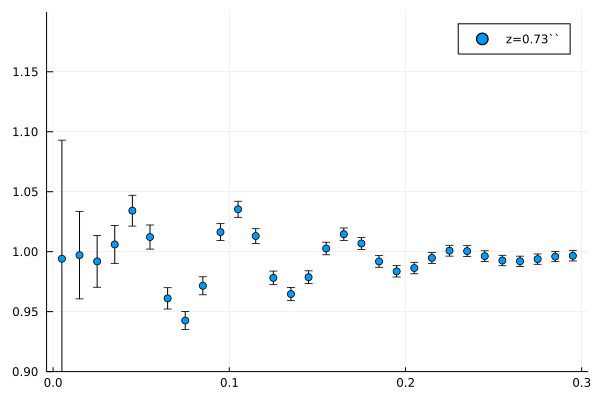

In [8]:
rr = 1:30
plot(Pk_mean[rr,1],ratio[rr],yerror=sqrt.(ratio_var[rr]/30),seriestype=:scatter,ylims=(0.9,1.2),label="z=0.73``")

In [9]:
# importing the required module
using CSV, DataFrames

# using write method
CSV.write("Pkavg_z0.50.DAT", DataFrame(hcat(Pk_mean,Pk_var,Pk_mean_no[:,2],Pk_var_no,ratio_var)),header = false,delim = '\t')

#CSV.write("Bkavg_bao.DAT", DataFrame(Bkk_mean),header = false,delim = '\t')

"Pkavg_z0.50.DAT"